# Assignment 1

Run the code below to install the required libraries from the requirements.txt for running the notebook. 

It is recommended to run this notebook in a virtual environment.

In [ ]:
!pip install -r requirements.txt

Make sure the .txt's are in the data folder in this hierarchy (unzipped)
- data/
    - Part_I_1-2/
        - 01.txt
        - 02.txt
        - 03.txt
        - 04.txt
        - 05.txt
    - Part_I_3/
        - pg74.txt
        - pg18381.txt
        - pgpg30165.txt

If you cloned this repository, the data should already be in the right place.

# Part 1. Tokenization, Stemming, Lemmatization, POS Tagging

## 1.1 Sentence splitting, word tokenization and plotting bar graphs of most frequent words

In [2]:
import nltk
nltk.download("punkt_tab")
from nltk import sent_tokenize 
from nltk import word_tokenize 
from nltk import FreqDist 
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from spacy.cli import download
from spacy.util import is_package
from spacy import displacy
import spacy_annotator as spa
from pathlib import Path
import gc
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package punkt_tab to /home/tijn-
[nltk_data]     do/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
texts = {}

def read_txts():
    global texts
    texts = {} # remove existing entries in the `texts` dictionary
    data_path = Path.cwd() / "data" / "Part_I_1-2"  # assigns your current working directory and adds the data folder
    
    #Open and read the .txt files
    for file in data_path.glob("*.txt"): # iterates through all .txt files in the directory
        with file.open(encoding="UTF-8") as f: # opens the txt file        
            texts[int(file.stem)] = f.read() #saves the text in the dictionary with the filenames (without .txt) as keys and the text as string as values

read_txts()
print(texts[1]) #note that `1` is not an index but a key in the dictionary. This line prints the text from 01.txt

Another plot?
Bones_Bard 

---

Missy was sitting on a chair in a house, maps and papers spread around, normally her planning was mental, but River had suggested a physical map to refer to and it was helpful. River walked out of the bedroom. “The people who own this house really have no good clothes.” She was wearing a t-shirt that drenched her form, and some trousers that looked about the right size, Missy smiled, still in her Mary Poppins looking outfit, River looked over at the maps. “Darling, wouldn’t it be better to start there?” She pointed at a place on the map. “It’s more central.” Missy smiles and leans back, placing a kiss on River’s jaw, a smile on her face, River reaches onto the table for a cup of coffee, gracefully sitting herself on the chair next to Missy, she raises the cups to her lips, wondering wether Missy had noticed yet. “That’s my cup!” River smiles, placing it down, Missy glares at her and River leans over to kiss her. The maps are still strewn over the table a

### All texts from the .txt files are now saved in the dictionary `texts`. 

#### Now we make a dictionary (`sent_split`) in which all texts are tokenized based on sentences using NLTK.

In [4]:
sent_split = {} # init a dictionary for the sentence split texts

for number, text in texts.items():
    sent_split[number] = sent_tokenize(text)

print(sent_split[5][0:5])

['WWTDD: What would the Doctor do?', 'aboutcustardcreams \n\n---\n\nIf the Doctor was there, you’d tell her she is an idiot.', 'How she always managed to do what’s right was beyond you.', 'It was easier to put the blame on her because it was her fault, at least a tiny bit, if you found yourself in that predicament, yet you weren’t angry with her.', 'You never could.']


### Now we do the same, but we tokenize words instead of sentences and save them in the dictionary `texts_tokenized`. We also lowercase all text for the sake of frequency counting. Punctuation is removed with the .isalpha() method. This method has to be applied after tokenization.

Note that `word_tokenize()` tokenizes posessive and contractive apostrophes into seperates tokens, so applying the isalpha() method does not accidentally remove any tokens like `'s` since these will be split into `'` and `s`. So in the code below, `'` will be removed and `s` is kept as a token. The code prints an example of a case where the apostrophe was removed.

In [5]:
texts_tokenized = {} 

for number, text in texts.items():  # iterate through the dictionary with all the texts
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()] #lowercasing of tokens and removing punctuation.
    texts_tokenized[number] = tokens  # adds list of tokens to the dictionary

print(texts_tokenized[4][0:11])
print(f"Example removed apostrophe: {texts_tokenized[4][210:212]}")

['even', 'if', 'the', 'language', 'of', 'flowers', 'is', 'dead', 'roses', 'always', 'mean']
Example removed apostrophe: ['didn', 't']


### Calculating and plotting word frequency distributions

In [6]:
freqdist_per_text = {}  #init a dictionary for the word frequencies per text

for number, tokens in texts_tokenized.items():   # iterate over the tokenized texts
    freqdist_per_text[number] = FreqDist(tokens) # NLTK's FreqDist calculates the frequency distribution of tokens

freqdist_per_text[1]

FreqDist({'the': 17, 'her': 12, 'river': 11, 'missy': 10, 'a': 10, 'and': 9, 'to': 8, 'was': 7, 'on': 7, 'it': 6, ...})

### The function below plots a bar graph based on a FreqDist object of the 25 most frequent words in the vocabulary.

In [7]:
def barplot_25_mfw(freqdist, title):
    """
    Plots a bar graph with the 25 most frequent words of a FreqDist object on the x-axis and the frequency of the word on the y-axis.

    freqdist: an NLTK FreqDist object
    title: title of the graph
    """
    top25 = freqdist.most_common(25) # creates a list with tuples that contain the 25 most frequent words and their frequencies
    words = [w for w, c in top25]    # creates a list with words extracted from top25
    counts = [c for w, c in top25]   # creates a list with the frequencies extracted from top25
    
    # plot bar chart
    plt.figure(figsize=(12,5))
    sns.barplot(x=words, y=counts, palette="magma", hue=words)
    plt.xticks(rotation=30)
    plt.title(title)
    plt.show()

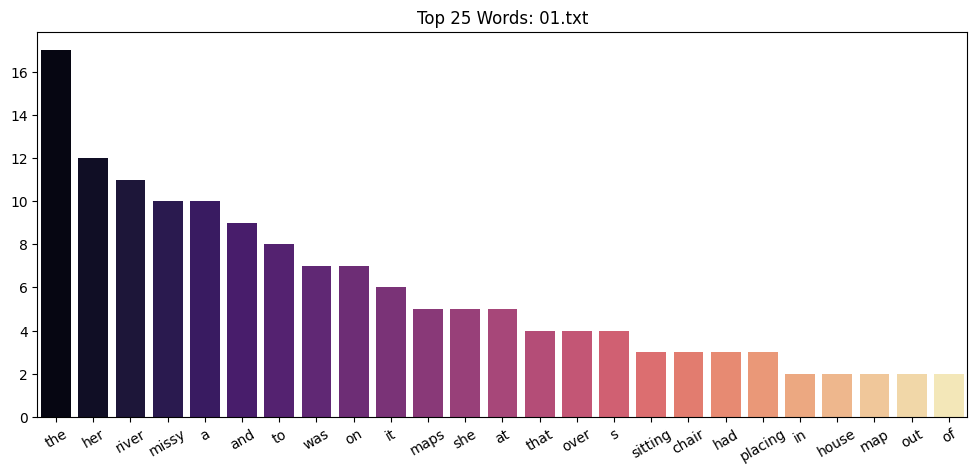

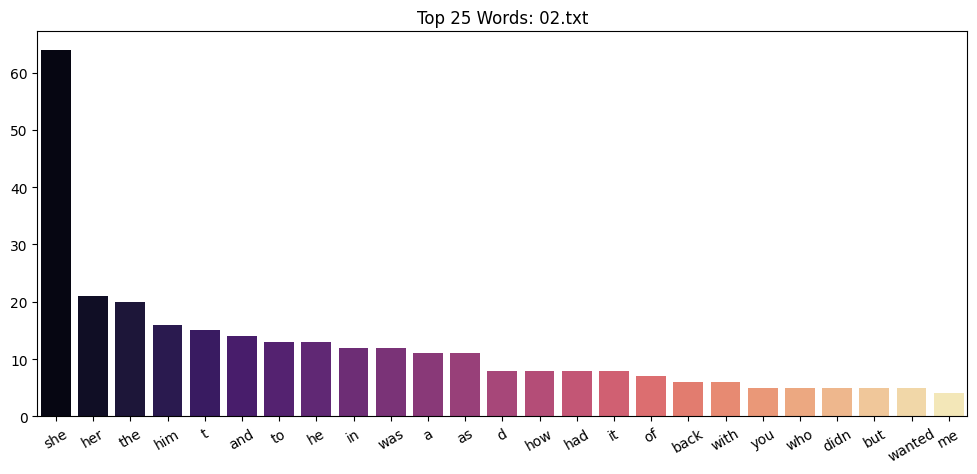

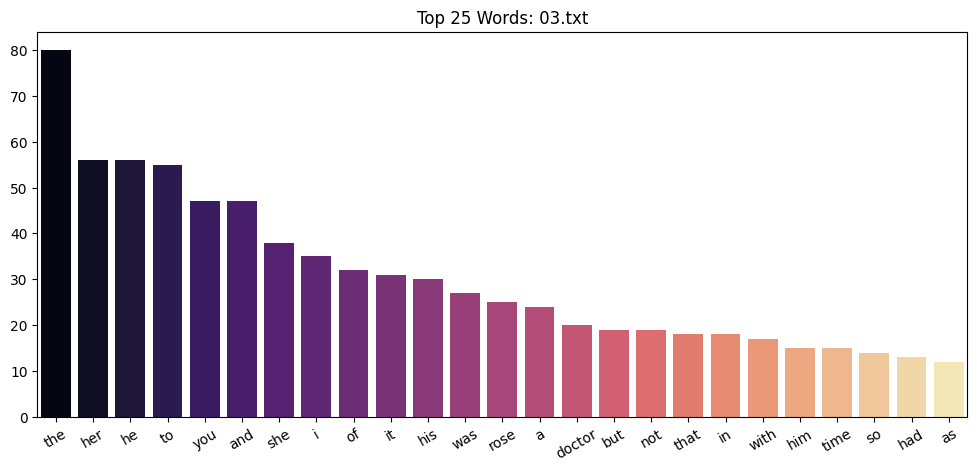

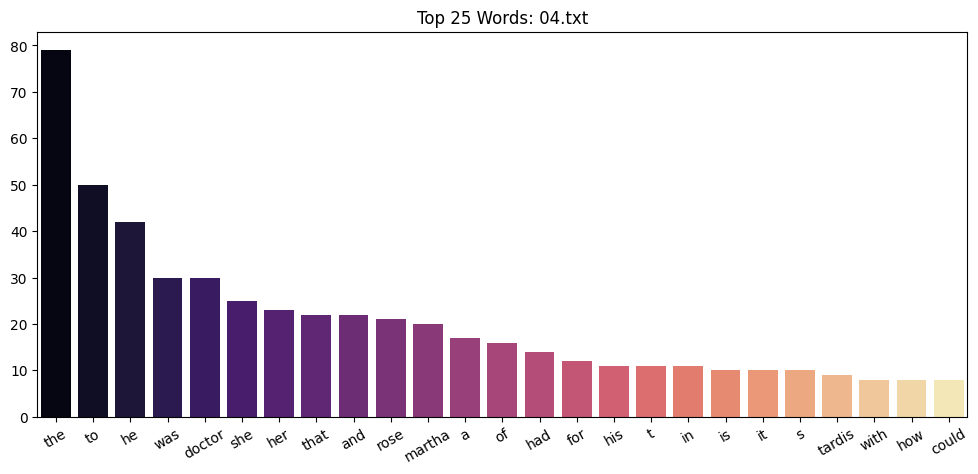

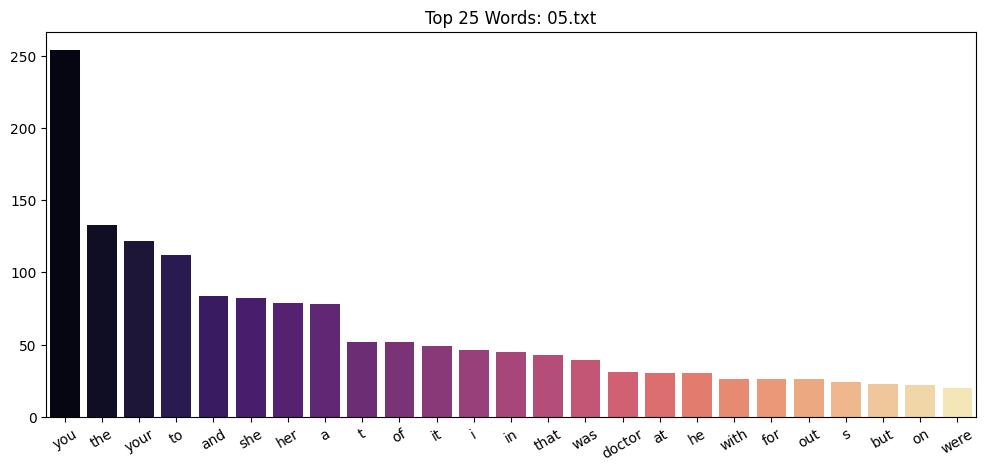

In [8]:
for n in range(len(freqdist_per_text)):
    barplot_25_mfw(freqdist_per_text[n+1], f"Top 25 Words: 0{n+1}.txt") # Top 25 most frequent words

### To calculate the word frequencies of all texts together, we can simply merge the 5 FreqDist objects

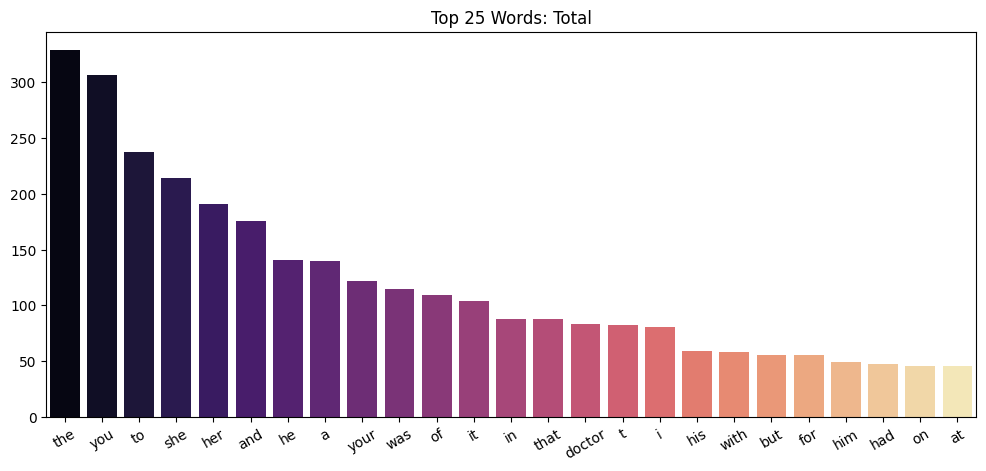

In [9]:
total_freqdist = freqdist_per_text[1] + freqdist_per_text[2] + freqdist_per_text[3] + freqdist_per_text[4] + freqdist_per_text[5]
barplot_25_mfw(total_freqdist, "Top 25 Words: Total")

## 1.2 Word frequencies after stemming with Lancaster and Porter stemmers

In [10]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

# initialize two dictionaires for the stemmed tokens
porter_stemmed_tokens = {}
lancaster_stemmed_tokens = {}

for number, tokens in texts_tokenized.items():   # iterate over `text_tokenized`, which contains the lowercased word tokens with punctuation removed
    porter_stemmed_tokens[number] = [PorterStemmer().stem(token) for token in tokens]    # applies stemming and adds the stemmed token to the the dictionary
    lancaster_stemmed_tokens[number] = [LancasterStemmer().stem(token) for token in tokens] # applies stemming and adds the stemmed token to the the dictionary

# print slices of stemmed and unstemmed tokens for comparison
print(f"Original tokens: {texts_tokenized[3][10:40]}\n\nLancaster stems: {lancaster_stemmed_tokens[3][10:40]}\n\nPorter stems: {porter_stemmed_tokens[3][10:40]}")

Original tokens: ['doctor', 'even', 'as', 'the', 'regeneration', 'energy', 'continues', 'to', 'build', 'the', 'ethereal', 'golden', 'gleam', 'that', 'swirled', 'along', 'the', 'flow', 'of', 'his', 'a', 'feeling', 'so', 'familiar', 'and', 'yet', 'never', 'welcome', 'never', 'without']

Lancaster stems: ['doct', 'ev', 'as', 'the', 'reg', 'energy', 'continu', 'to', 'build', 'the', 'eth', 'gold', 'gleam', 'that', 'swirl', 'along', 'the', 'flow', 'of', 'his', 'a', 'feel', 'so', 'famili', 'and', 'yet', 'nev', 'welcom', 'nev', 'without']

Porter stems: ['doctor', 'even', 'as', 'the', 'regener', 'energi', 'continu', 'to', 'build', 'the', 'ether', 'golden', 'gleam', 'that', 'swirl', 'along', 'the', 'flow', 'of', 'hi', 'a', 'feel', 'so', 'familiar', 'and', 'yet', 'never', 'welcom', 'never', 'without']


In the snippet of tokens from the Lancester and Porter stemming algorithms, we can identify some differences:

|Original|Lancaster|Porter|
|---|---|---|
|doctor|doct|doctor|
|ever|ev|ever|
|regeneration|reg|regener|
|energy|energy|energi|


The Porter stemmer stems the `y` in `energy` to `energi`, where Lancaster doesn't change the token.

For the token `regeneration`, the Lancaster algorithm strips `eneration` as a suffix and Porter only strips `ation`.

The Lancaster stemmer seems to strip `or` and `er` from `doctor` and `ever` respectively, whereas  the Porter stemmer does not.

In these examples, the Lancaster stemmer seems to strip more characters from the token than the Porter stemmer does.

### NLTK's FreqDist calculates the frequency distributions of the stemmed tokens

In [11]:
# initialize two dictionaires for storing the frequency distributions of the stemmed tokens
freqdists_porter = {}
freqdists_lancaster = {}

for number, tokens in porter_stemmed_tokens.items(): # iterate over the Porter stemmed tokens
    freqdists_porter[number] = FreqDist(tokens) # NLTK's FreqDist calculates the frequency distribution of tokens

for number, tokens in lancaster_stemmed_tokens.items(): # iterate over the PLancaster stemmed tokens
    freqdists_lancaster[number] = FreqDist(tokens) # NLTK's FreqDist calculates the frequency distribution of tokens

print(f"Unstemmed: {freqdist_per_text}\n\nPorter:{freqdists_porter}\n\nLancaster: {freqdists_lancaster}")

Unstemmed: {1: FreqDist({'the': 17, 'her': 12, 'river': 11, 'missy': 10, 'a': 10, 'and': 9, 'to': 8, 'was': 7, 'on': 7, 'it': 6, ...}), 3: FreqDist({'the': 80, 'her': 56, 'he': 56, 'to': 55, 'you': 47, 'and': 47, 'she': 38, 'i': 35, 'of': 32, 'it': 31, ...}), 4: FreqDist({'the': 79, 'to': 50, 'he': 42, 'was': 30, 'doctor': 30, 'she': 25, 'her': 23, 'that': 22, 'and': 22, 'rose': 21, ...}), 5: FreqDist({'you': 254, 'the': 133, 'your': 122, 'to': 112, 'and': 84, 'she': 82, 'her': 79, 'a': 78, 't': 52, 'of': 52, ...}), 2: FreqDist({'she': 64, 'her': 21, 'the': 20, 'him': 16, 't': 15, 'and': 14, 'to': 13, 'he': 13, 'in': 12, 'was': 12, ...})}

Porter:{1: FreqDist({'the': 17, 'her': 12, 'river': 11, 'missi': 10, 'a': 10, 'and': 9, 'to': 8, 'wa': 7, 'on': 7, 'map': 7, ...}), 3: FreqDist({'the': 80, 'her': 57, 'he': 56, 'to': 55, 'you': 47, 'and': 47, 'she': 38, 'i': 35, 'of': 32, 'it': 31, ...}), 4: FreqDist({'the': 79, 'to': 50, 'he': 42, 'wa': 30, 'doctor': 30, 'she': 25, 'her': 24, 'rose'

In [12]:
def barplot_25_combined(fd1, fd2, fd3, title, labels=("Porter", "Lancaster", "Unstemmed")):
    """
    Takes three FreqDist objects (stemmed/unstemmed)
    Calculates the union of the top 25 most frequent words per FreqDist
    Plots a comparative bar chart with the words on the x-axis and the frequencies of the y axis
    This function expect the FreqDist in the following order: Porter (fd1), Lancaster (fd2), Unstemmed (fd3)
    
    fd1: takes a FreqDist object of the stemmed tokens (Porter stemmer)
    fd2: takes a FreqDist object of the stemmed tokens (Lancaster stemmer)
    fd3: takes a FreqDist object of unstemmed tokens
    title: title for the graph
    labels: names of the FreqDist, default: ("Porter", "Lancaster", "Unstemmed")
    """
    fds = [fd1, fd2, fd3]
    
    # get union of top-25 words
    vocab = []
    for fd in fds:
        vocab.extend([w for w, f in fd.most_common(25)])

    rows = []
    for fd, label in zip(fds, labels): # iterate over the freqdists and the corresponding labels
        for word in vocab:  # iterate over the union of the top 25 words per freqdist
            
            # adds a dictionary to the `rows` list with frequencies per word and the stemmer.
            rows.append({
                "word": word,
                "frequency": fd[word],  #look up the frequence 
                "legend": label
            })

    # turns the `rows` (list with dicts) into a DataFrame for plotting with Seaborn
    df = pd.DataFrame(rows)

    # plot the chart
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x="word", y="frequency", hue="legend")
    plt.xticks(rotation=90)
    plt.grid(axis="y")
    plt.ylabel("Frequency")
    plt.xlabel("Word")
    plt.title(title)
    plt.tight_layout()
    plt.show()

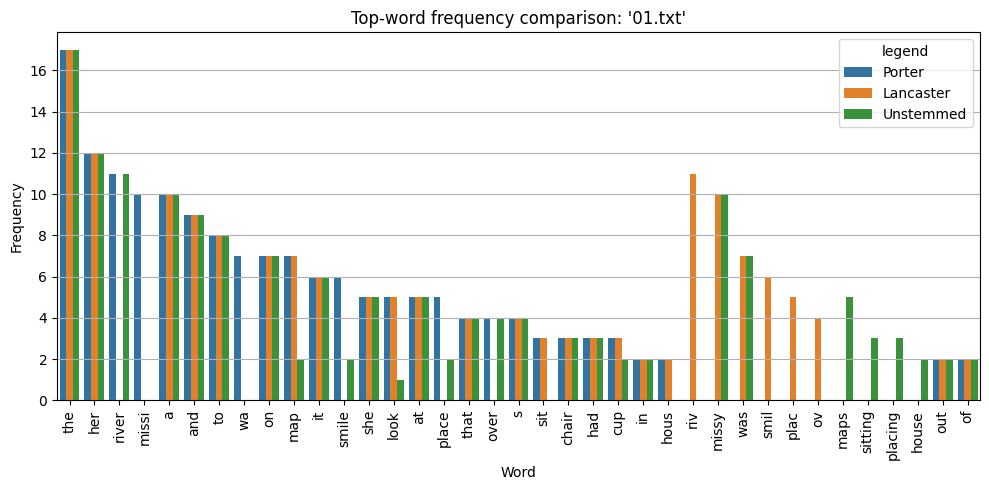

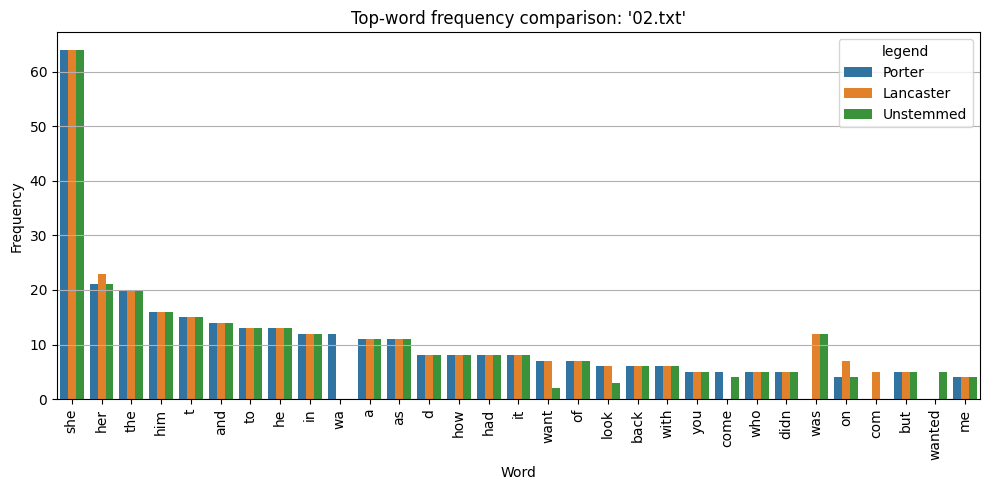

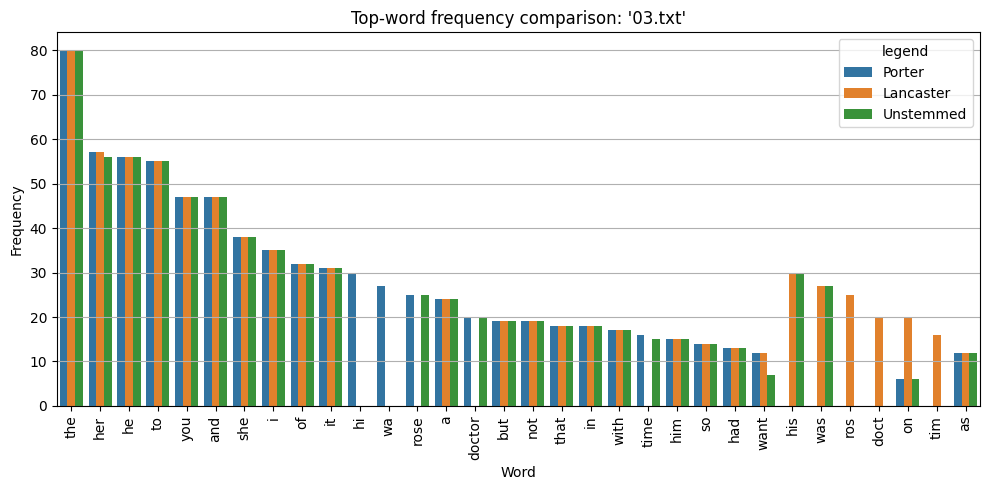

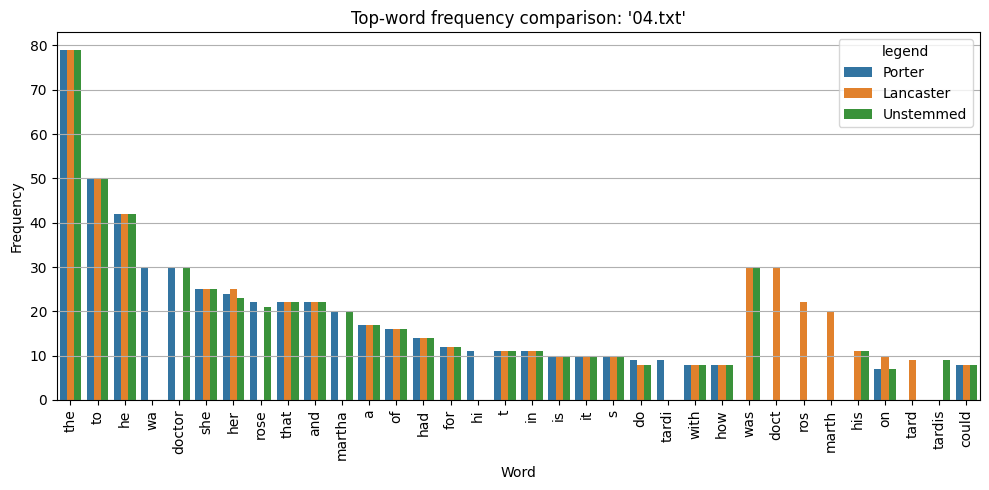

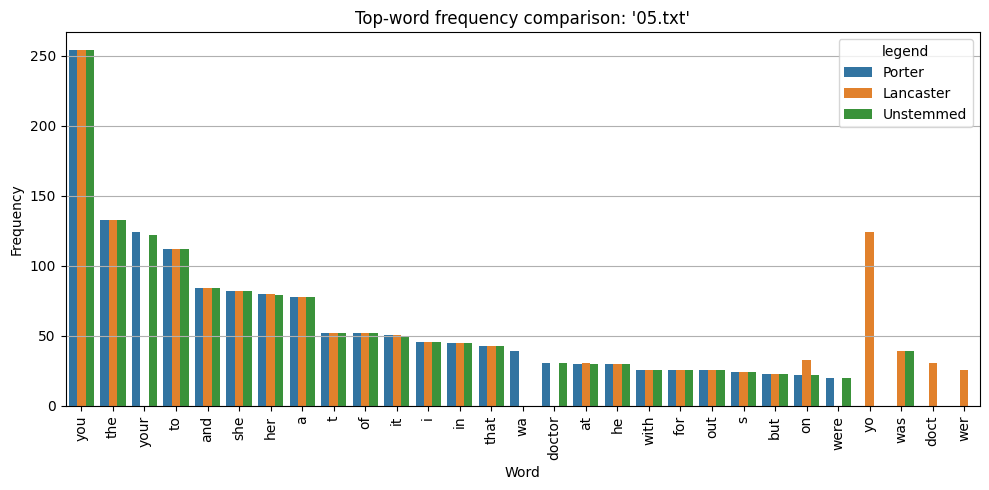

In [13]:
for n in range(1,6):
    barplot_25_combined(freqdists_porter[n], freqdists_lancaster[n], freqdist_per_text[n], f"Top-word frequency comparison: '0{n}.txt'")

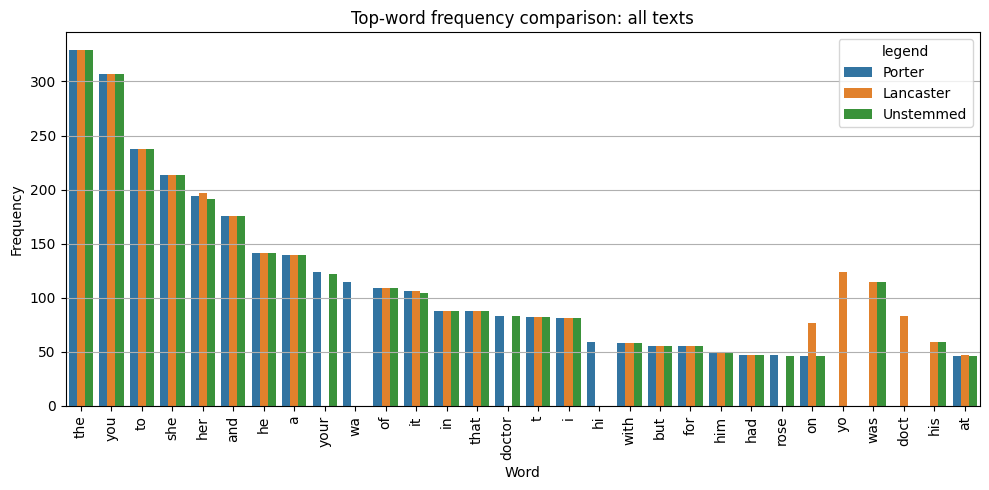

In [14]:
# create a sum of the freqdists for each text per stemmer, and plot it
total_lancaster = freqdists_lancaster[1] + freqdists_lancaster[2] + freqdists_lancaster[3] + freqdists_lancaster[4] + freqdists_lancaster[5]
total_porter = freqdists_porter[1] + freqdists_porter[2] + freqdists_porter[3] + freqdists_porter[4] + freqdists_porter[5]
barplot_25_combined(total_porter, total_lancaster, total_freqdist, "Top-word frequency comparison: all texts")

## 1.3 POS tagging with SpaCy

In [15]:
data_path = Path.cwd() / "data" / "Part_I_3"  # assigns your current working directory and adds the data folder

texts = {}

for file in data_path.glob("*.txt"): # iterates through all txt files in the directory
    with file.open(encoding="UTF-8") as f: # opens the txt file        
        texts[file.stem] = f.readlines() # We use readlines() instead of read() to make the cleaning of the text easier.

print(texts.keys()) #print the keys, so we know how to call the texts from the dict

dict_keys(['pg30165', 'pg74', 'pg18381'])


### Cleaning the texts

The text we want to analyze exists between two identifiable lines: 

`*** START OF THE PROJECT GUTENBERG EBOOK [title] ***`

`*** END OF THE PROJECT GUTENBERG EBOOK [title] ***`

By using readlines() in the code above, we can easily identify these two lines and remove everything that fall outside of these lines of text.

The decision here is to remove the text generated by Project Gutenberg outside of the lines mentioned above and keep all content of the 'original ebook' per translation. Please note that some differences exist in the (translated) versions of the novels: for example, the English version has an extensive list of figures and a table of content that the German translation lacks. 

In [16]:
def clean_gutenberg_text(key, lines):
    """
    Extracts the main text from a Gutenberg file.

    Parameters:
        key (str): Identifier for the text (used as dictionary key)
        lines (list of str): Lines from readlines()

    Returns:
        dict: {key: main_text} as one big string
    """

    start_idx = 0
    end_idx = len(lines)

    # Find start and end markers
    for i, line in enumerate(lines):
        if "*** START OF" in line:
            start_idx = i + 1  # start after this line
        if "*** END OF" in line:
            end_idx = i        # end before this line
            break
            
    # Extract main content and join into a single string
    main_text = "".join(lines[start_idx:end_idx])
    
    return {key: main_text}

In [17]:
for key, lines in texts.items():
    texts.update(clean_gutenberg_text(key, lines)) # apply the function with .update() to overwrite the values in the dictionary

#### To make the POS tagging process easier, the keys of the `texts` dictionary are changed to their corresponding language. (`pg30165` --> `deutsch`)

In [18]:
texts["German"] = texts.pop("pg30165")
texts["Dutch"] = texts.pop("pg18381")
texts["English"] = texts.pop("pg74")

texts.keys()

dict_keys(['German', 'Dutch', 'English'])

### POS Tagging

In [19]:
# download the medium spacy models for english, german and dutch after checking if the model is not downloaded yet
# due to hardware limitations, the medium models were chosen (the kernel crashed when attempting to use the large models).

models = ["en_core_web_md", "nl_core_news_md", "de_core_news_md"]

for model in models:
    if not is_package(model):
        download(model)
    else:
        print(f"{model} is already downloaded")

en_core_web_md is already downloaded
nl_core_news_md is already downloaded
de_core_news_md is already downloaded


#### The code below loads the corresponding SpaCy model based on the language and extracts tokens as well as coarse grained POS tags.

In [20]:
df = pd.DataFrame(list(texts.items()), columns=['language', 'text'] ) # make a dataframe based on the dictionary `texts`

pos = {}
tokens = {}

# apply POS tagging with corresponding language models
for key, text in texts.items():
    if key == 'English':
        nlp_en = spacy.load("en_core_web_md") # load the model
        doc = nlp_en(text)
        del nlp_en # deleting this variable saves memory so the kernel doesnt shut down
        gc.collect() # free up memory
        
    if key == 'Dutch':
        nlp_nl = spacy.load("nl_core_news_md") # load the model
        doc = nlp_nl(text)
        del nlp_nl # deleting this variable saves memory so the kernel doesnt shut down
        gc.collect() # free up memory
        
    if key == 'German':
        nlp_de = spacy.load("de_core_news_md") # load the model
        doc = nlp_de(text)
        del nlp_de # deleting this variable saves memory so the kernel doesnt shut down
        gc.collect() # free up memory
    
    pos[key] = [token.pos_ for token in doc]  #.pos_ uses coarse grained pos tags
    tokens[key] = [token.text for token in doc]
    del doc  #delete the memory heavy doc variable after extracting the pos tags and tokens
    gc.collect() # free up memory
    print(f"processed {key}") #progress indication
    
df['tokens'] = df['language'].map(tokens) # adds a column that contains a list of tokens
df['pos_tags'] = df['language'].map(pos) # adds a column that contains a list of POS tags
df.head()

processed German
processed Dutch
processed English


,language,text,tokens,pos_tags
0,German,\n\n\nProduced by Jens Sadowski\n\n\n\n\nTrans...,"[\n\n\n, Produced, by, Jens, Sadowski, \n\n\n\...","[SPACE, X, X, PROPN, PROPN, SPACE, PROPN, PROP..."
1,Dutch,\n\n\n\nProduced by Jeroen Hellingman and the ...,"[\n\n\n\n, Produced, by, Jeroen, Hellingman, a...","[SPACE, PROPN, SYM, PROPN, PROPN, SYM, SYM, SY..."
2,English,\n\n\n\nTHE ADVENTURES OF TOM SAWYER\n\n\nBy M...,"[\n\n\n\n, THE, ADVENTURES, OF, TOM, SAWYER, \...","[SPACE, DET, PROPN, ADP, PROPN, PROPN, SPACE, ..."


In [21]:
# print a list of abbreveviation explanation of the coarse grained pos tags
pos_tagset = sorted(set(df['pos_tags'][0])) # get unique pos tags and sort them
for tag in pos_tagset:
    print(tag, spacy.explain(tag))

ADJ adjective
ADP adposition
ADV adverb
AUX auxiliary
CCONJ coordinating conjunction
DET determiner
INTJ interjection
NOUN noun
NUM numeral
PART particle
PRON pronoun
PROPN proper noun
PUNCT punctuation
SCONJ subordinating conjunction
SPACE space
VERB verb
X other


#### We can use the bar plot function from earlier to get insights into the differneces in POS tags among the translations and the original

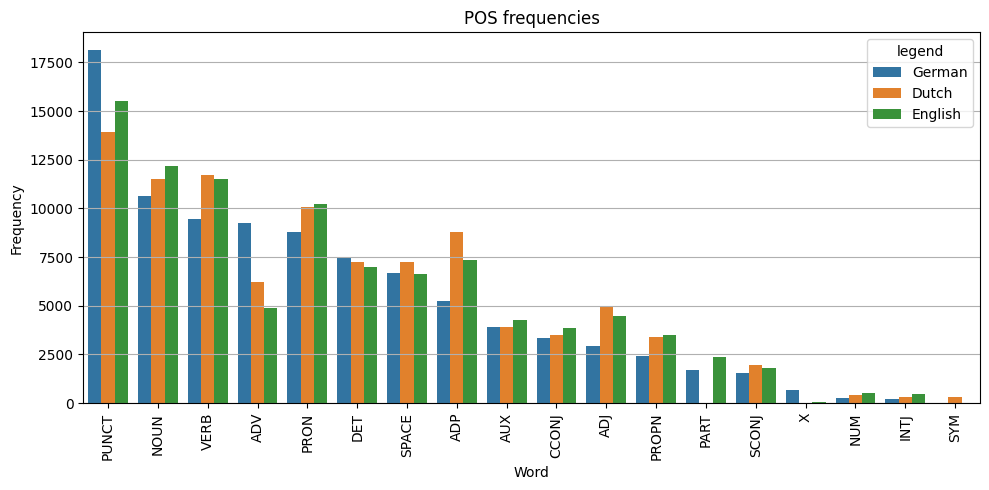

In [22]:
pos_freq_de = FreqDist(df.loc[0, 'pos_tags'])
pos_freq_nl = FreqDist(df.loc[1, 'pos_tags'])
pos_freq_en = FreqDist(df.loc[2, 'pos_tags'])

# reuse the function from section 1.1, changed the default labels. Since the coarse grained pos tagset consists of 18 tags, the top25 sleection will not change the results
barplot_25_combined(pos_freq_de,  pos_freq_nl, pos_freq_en, "POS frequencies", labels=("German","Dutch", "English"))

Since the total amount of words differs between the texts, more accurate comparison can be done when normalizing the POS tag frequencies by dividing them through the total token count per text.


Token counts: 
German     92761
Dutch      95587
English    96612
dtype: int64


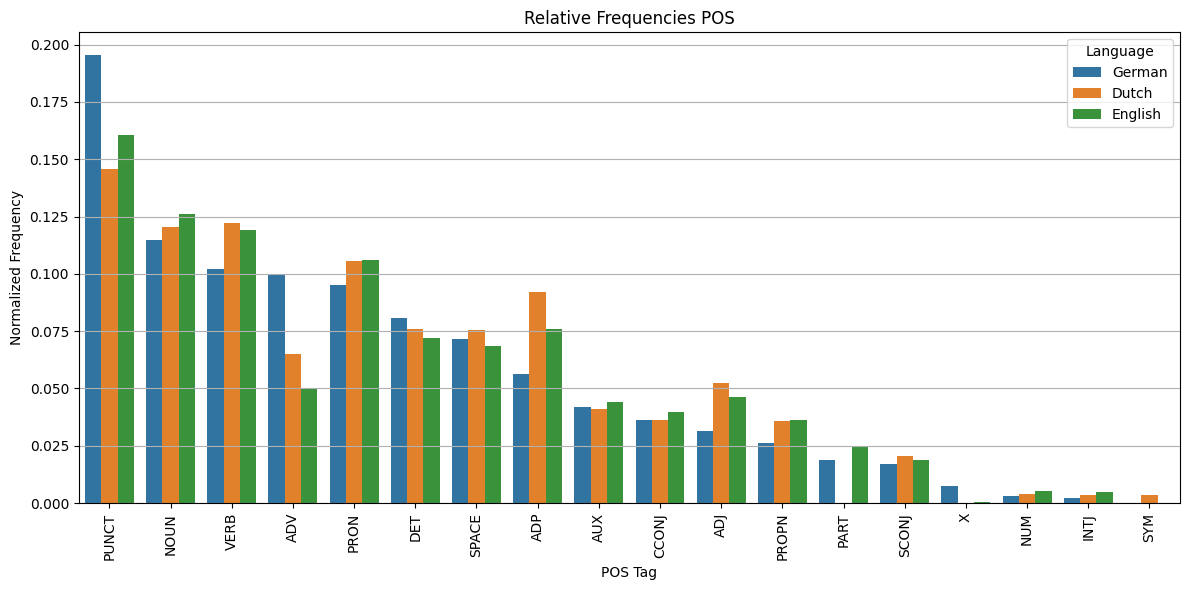

In [23]:
# make a new df that uses value_counts rather than FreqDist
df_pos = pd.concat([
    pd.Series(df.loc[i, 'pos_tags']).value_counts().rename(language)
    for i, language in enumerate(df['language'])
], axis=1).fillna(0).astype(int)

print(f"Token counts: \n{df_pos.sum()}")

# normalize counts by column (token count per language)
df_pos_norm = df_pos.div(df_pos.sum(axis=0), axis=1)

# convert to long format for seaborn
df_pos_long = df_pos_norm.reset_index().melt(id_vars='index', var_name='Language', value_name='Frequency')
df_pos_long = df_pos_long.rename(columns={'index': 'POS'})

# plot
plt.figure(figsize=(12, 6))
sns.barplot(x='POS', y='Frequency', hue='Language', data=df_pos_long)
plt.title('Relative Frequencies POS')
plt.ylabel("Normalized Frequency")
plt.xlabel("POS Tag")
plt.xticks(rotation=90)
plt.legend(title='Language')
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Part 2. Named Entity Recognition

## 2.1 Manual Annotation vs. SpaCy NER

In part 1.1, the texts from `/data/part_1_1-2` were tokenized and stored in the dictionary `sent_split`. These tokens will be used to sample sentences for manual annotation. Note that punctuation is not removed, nor are the tokens lowercased. Capitalized words may indicate named entities, so preserving casing is important.

For automatic NER, the transformer model `en_core_web_trf` is applied, but only to the sampled sentences to limit computational cost.

For manual annotation, I use the same tag set as the `en_core_web_trf` entity tagger to enable a direct comparison with the automatic NER results.

In [24]:
if not is_package("en_core_web_trf"):
    download("en_core_web_trf") # download the transformer model if it's missing

nlp = spacy.load("en_core_web_trf")
ner = nlp.get_pipe("ner")

for label in ner.labels:
    print(label, ':', spacy.explain(label)) # use spacy .explain() to get information on the tags

def ner(text):
    """
    Takes a single string, applies the NLP pipeline and renders the recognized entities
    """
    doc = nlp(text)
    displacy.render(doc, style='ent', jupyter=True)

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


### 01.txt

In [25]:
print(" ".join(sent_split[1][5:7])) # sentence 5 and 6 contain many mentions of named persons

“It’s more central.” Missy smiles and leans back, placing a kiss on River’s jaw, a smile on her face, River reaches onto the table for a cup of coffee, gracefully sitting herself on the chair next to Missy, she raises the cups to her lips, wondering wether Missy had noticed yet. “That’s my cup!” River smiles, placing it down, Missy glares at her and River leans over to kiss her.


Manual annotation:

“It’s more central.” [Missy]`PER` smiles and leans back, placing a kiss on [River]`PER`’s jaw, a smile on her face, [River]`PER` reaches onto the table for a cup of coffee, gracefully sitting herself on the chair next to [Missy]`PER`, she raises the cups to her lips, wondering wether [Missy]`PER` had noticed yet. “That’s my cup!” [River]`PER` smiles, placing it down, [Missy]`PER` glares at her and [River]`PER` leans over to kiss her.
 
SpaCy NER:

In [26]:
ner(" ".join(sent_split[1][5:7])) # a single string is passed into the NER pipeline, so it is tokenized by spacy and not per sentence

#### In this sample, there are 8 true positives. We save this to a variable (and initialize variables for false positives and false negatives).

In [27]:
tp = 8 # true positives: entitities correctly predicted
fp = 0 # false positives: entity recognized by model but not in the annotation
fn = 0  # false negatives: entity exists in manual annotation but is not or wrongly recognized by the model

### 02.txt

In [28]:
print(sent_split[2][7])

She wished it could have been him after he knew who she was, because what he was mostly talking about was 1969, she wanted to know how her parents were in New York, she wanted the more mature version of him, but she lent against him, sitting in the garden, gently pulling him up to show him the three children she had been left with, it wasn’t night yet and they were playing together.


Manual annotation:

She wished it could have been him after he knew who she was, because what he was mostly talking about was [1969]`DATE`, she wanted to know how her parents were in [New York]`GPE`, she wanted the more mature version of him, but she lent against him, sitting in the garden, gently pulling him up to show him the [three]`CARDINAL` children she had been left with, it wasn’t night yet and they were playing together.

SpaCy NER:

In [29]:
ner("".join(sent_split[2][7]))

In [30]:
tp += 3 # true positives: entitities correctly predicted
fp += 1 # entity recognized by model but not in the annotation 
# not tagging `night' as TIME might be a human error on my part, but we'll include it as a false positive nonetheless for now
fn += 0  # entity exists in manual annotation but is not or wrongly recognized by the model

11 1 0


### 03.txt

In [31]:
print(" ".join(sent_split[3][17:20])) # I picked these sentences because I suspect the NER might disagree with me

"I was going to take you to so many places. Barcelona. Not the city Barcelona, the planet Barcelona.


Manual annotation:

I was going to take you to so many places. [Barcelona]`LOC`. Not the city [Barcelona]`GPE`, the planet [Barcelona]`LOC`.

SpaCy NER:

In [32]:
ner(" ".join(sent_split[3][17:20]))

#### In this sentence i chose to classify Barcelona (planet) as a LOC, since i assumed this is not a geopolitcal entity (i would also classify planet Earth as a LOC). The NER model probablt still classifies it as a city and therefore a GPE.

In [33]:
tp += 1 # true positives: entitities correctly predicted
fp += 0 # entity recognized by model but not in the annotation 
fn += 2  # entity exists in manual annotation but is not or wrongly recognized by the model

### 04.txt

In [34]:
print(" ".join(sent_split[4][26:28]))

The TARDIS wasn’t meant to translate Gallifreyan to other languages. So, very early on, The Doctor had adjusted some things so she could translate Gallifreyan to English.


Manual annotation:

The [TARDIS]`PRODUCT` wasn’t meant to translate [Gallifreyan]`LANGUAGE` to other languages. So, very early on, [The Doctor]`PER` had adjusted some things so she could translate [Gallifreyan]`LANGUAGE` to [English]`LANGUAGE`.

SpaCy NER:

In [35]:
ner(" ".join(sent_split[4][26:28]))

In [36]:
tp += 2 # true positives: entitities correctly predicted
fp += 2 # false positives entity recognized by model but not in the annotation 
fn += 1 # entity exists in manual annotation but is not or wrongly recognized by the model

### 05.txt

In [37]:
index = sent_split[5].index('The Torvash laughed, “Not so cheeky now, are you, Time Lord?”\n\n \n\n“F-fuck y-you!” You hissed, eyes darkening towards him.')
print(sent_split[5][index])

The Torvash laughed, “Not so cheeky now, are you, Time Lord?”

 

“F-fuck y-you!” You hissed, eyes darkening towards him.


Manual annotation:

The [Torvash]`PER` laughed, “Not so cheeky now, are you, [Time Lord]`PER`?”

 

“F-fuck y-you!” You hissed, eyes darkening towards him.


SpaCy NER:

In [38]:
ner(sent_split[5][index])

In [39]:
tp += 1 # true positives: entitities correctly predicted
fp += 0 # false positives entity recognized by model but not in the annotation 
fn += 1 # entity exists in manual annotation but is not or wrongly recognized by the model

## 2.2 F1-score on sample sentences

In [40]:
print(f"True Positives: {tp}\nFalse Positives: {fn}\nFalse Negatives: {fn}")

True Positives: 15
False Positives: 4
False Negatives: 4


#### Calculate precision, recall and F1

In [41]:
precision = tp/ (tp+fp)
recall = tp / (tp +fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Precision: 0.8333333333333334
Recall: 0.7894736842105263
F1: 0.8108108108108109
